<a href="https://colab.research.google.com/github/TsuguHatoba/PCD/blob/main/tugas/Pengolahan_Citra_Digital_Tugas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Muhammad Fadillah Hassan**<br>
**2010817110005**



# **TUGAS 1 PCD**

In [ ]:
#UPLOAD IMAGES

from PIL import Image
import numpy as np
from google.colab import files

# Upload gambar
uploaded = files.upload()

# Baca gambar yang diupload
input_image_path = list(uploaded.keys())[0]

# Buka gambar dengan PIL
img = Image.open(input_image_path)

Saving burung.jpg to burung.jpg


**Image RGB**

In [ ]:
from PIL import Image
import numpy as np
from google.colab import files

img = Image.open("burung.jpg")

# Ubah gambar menjadi array numpy
img_array = np.array(img)

# Buat salinan array gambar untuk masing-masing warna
img_merah = np.copy(img_array)
img_hijau = np.copy(img_array)
img_biru = np.copy(img_array)

# Setel kanal hijau dan biru menjadi nol pada gambar merah
img_merah[:, :, 1] = 0  # Kanal Hijau
img_merah[:, :, 2] = 0  # Kanal Biru

# Setel kanal merah dan biru menjadi nol pada gambar hijau
img_hijau[:, :, 0] = 0  # Kanal Merah
img_hijau[:, :, 2] = 0  # Kanal Biru

# Setel kanal merah dan hijau menjadi nol pada gambar biru
img_biru[:, :, 0] = 0  # Kanal Merah
img_biru[:, :, 1] = 0  # Kanal Hijau

# Buat gambar PIL dari array yang sudah diubah
img_merah = Image.fromarray(img_merah)
img_hijau = Image.fromarray(img_hijau)
img_biru = Image.fromarray(img_biru)

# kalau gapake show akan menampilkan arraynya bukan gambarnya
img_merah.show()
img_hijau.show()
img_biru.show()

# Display gambar ketika run
display(img)
display(img_merah)
display(img_hijau)
display(img_biru)


**Image Binary (Kalau Dari Grayscale)**

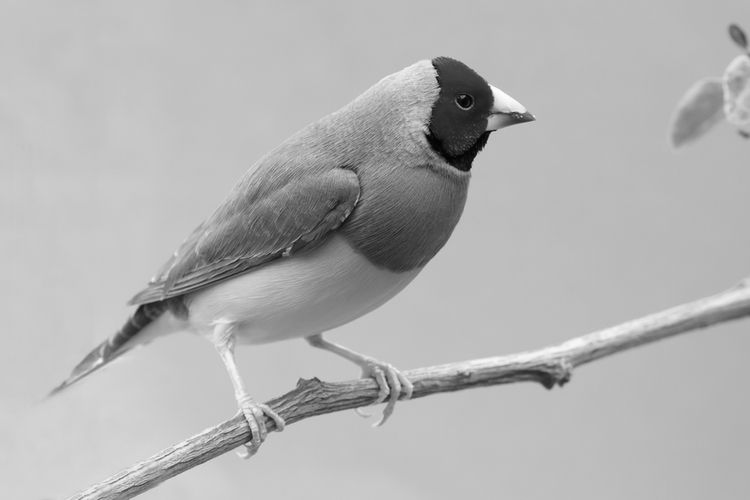

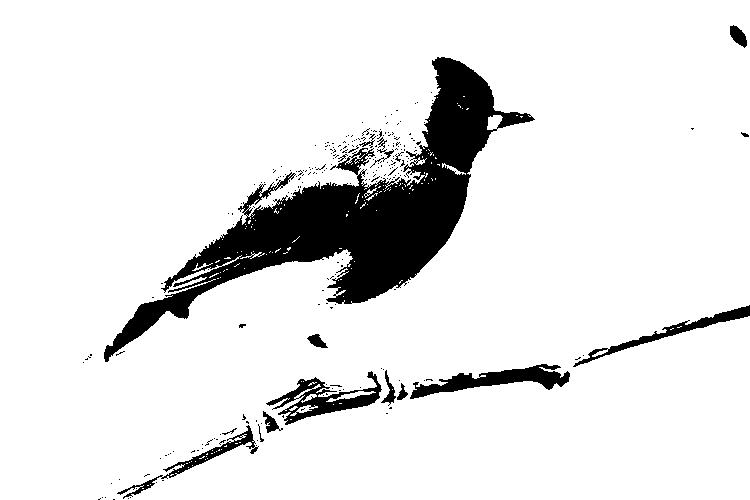

In [ ]:
from PIL import Image
import numpy as np
from google.colab import files

img = Image.open("burung.jpg")

img_gray = img.convert('L')

img_gray.save("burung_gray.jpg")

threshold = 128

img_binary = img_gray.point(lambda x: 0 if x < threshold else 255, '1')

# # Konversi gambar menjadi citra biner dengan mode '1'
# img_binary = img.convert('1')

# Tampilkan citra biner
img_binary.show()

display(img_gray)
display(img_binary)


**Kuantitasi citra 1-8bit**

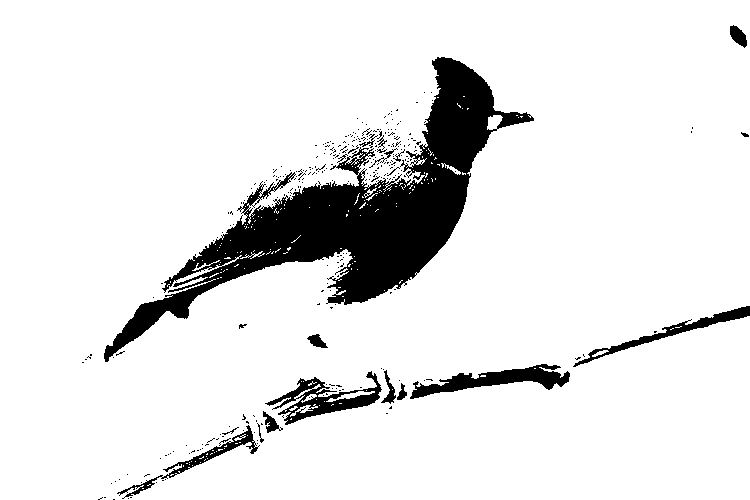

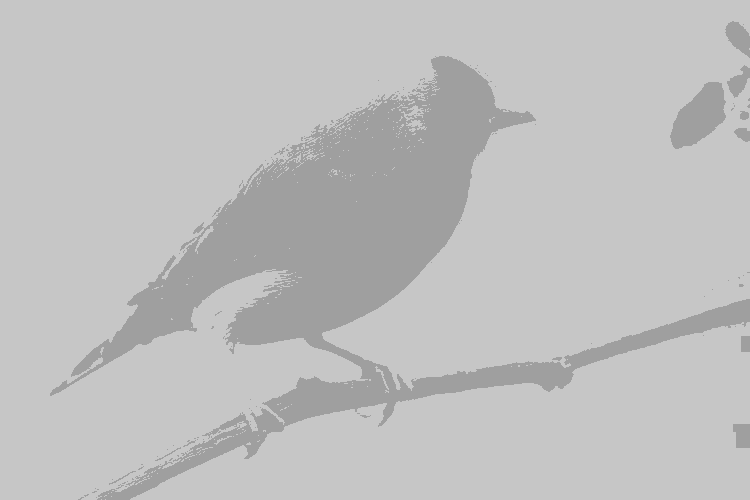

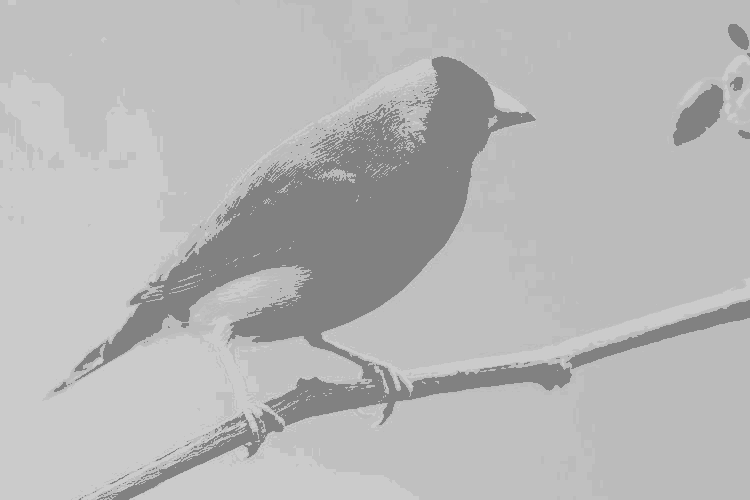

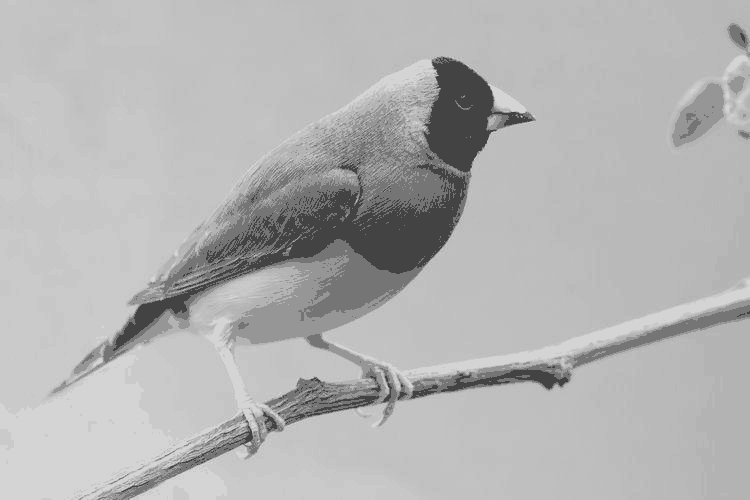

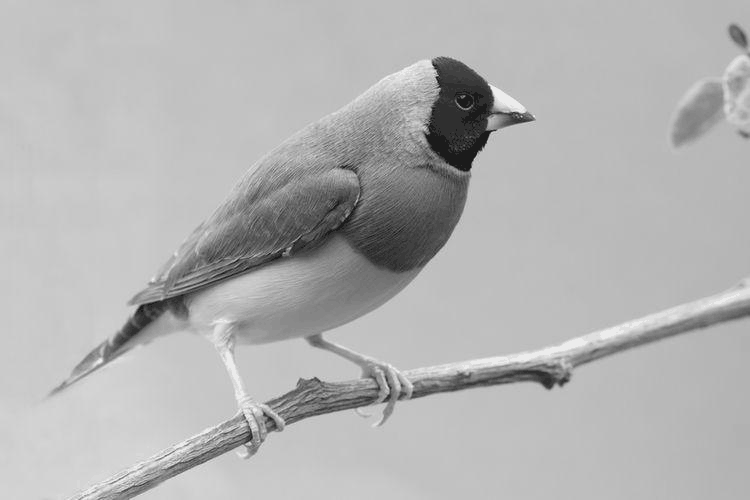

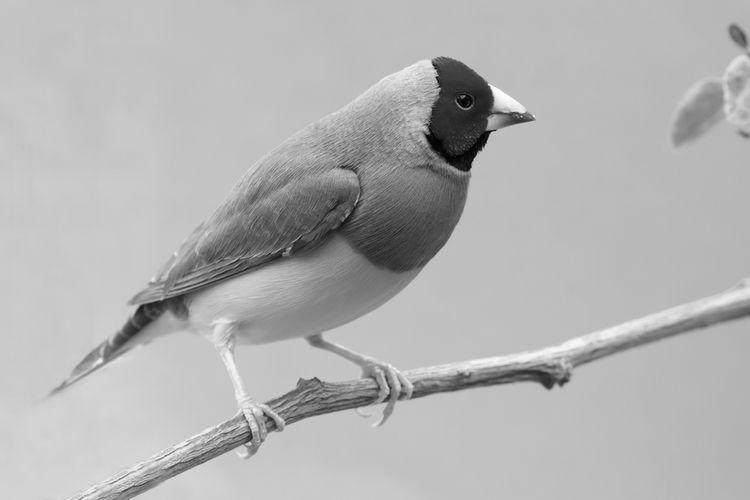

In [ ]:
from PIL import Image
import numpy as np
from google.colab import files

img = Image.open("burung_gray.jpg")

# Konversi dengan threshold

# Konversi gambar menjadi citra biner dengan threshold tertentu (misalnya, 128)
threshold = 128
img_binary = img.point(lambda x: 0 if x < threshold else 255, '1')

# Konversi dengan quantize

# 1 bit akan memberi Anda 2^1 = 2 tingkat (biasanya 0 dan 1).
# 2 bit akan memberi Anda 2^2 = 4 tingkat (0, 1, 2, dan 3).
# 4 bit akan memberi Anda 2^4 = 16 tingkat.
# 6 bit akan memberi Anda 2^6 = 64 tingkat.
quantized_img_1 = img.convert('L').quantize(colors=2)
quantized_img_2 = img.convert('L').quantize(colors=4)
quantized_img_4 = img.convert('L').quantize(colors=16)
quantized_img_6 = img.convert('L').quantize(colors=64)
quantized_img_8 = img.convert('L').quantize(colors=256)

# Tampilkan citra yang di kuantisasi
display(img_binary)
display(quantized_img_1)
display(quantized_img_2)
display(quantized_img_4)
display(quantized_img_6)
display(quantized_img_8)


**Kualitas Citra (Dengan Pixel)**

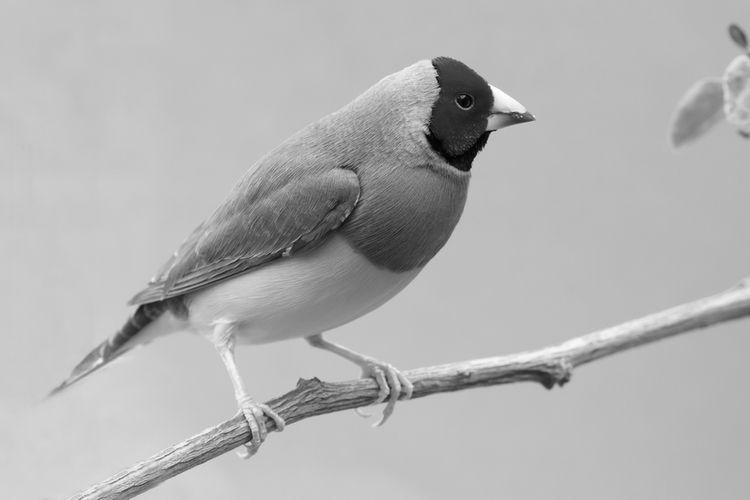

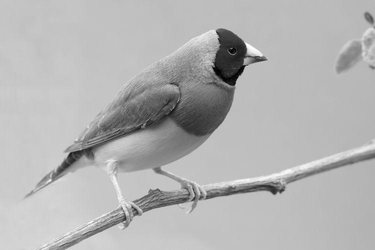

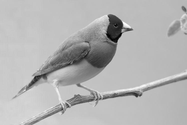

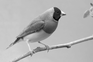

In [ ]:
from PIL import Image
import numpy as np
from google.colab import files

# Buka gambar dengan PIL
img = Image.open("burung_gray.jpg")

# Tentukan ukuran citra yang lebih kecil (misalnya, setengah dari ukuran asli)
new_size = (img.width // 2, img.height // 2)
new_size2 = (img.width // 4, img.height // 4)
new_size3 = (img.width // 8, img.height // 8)

# Kurangi resolusi dengan mengubah ukuran citra menggunakan LANCZOS resampling
low_quality_img = img.resize(new_size, Image.LANCZOS)
very_low_quality_img = img.resize(new_size2, Image.LANCZOS)
very_very_low_quality_img = img.resize(new_size3, Image.LANCZOS)

# Tampilkan citra yang telah diubah resolusinya
display(img)
display(low_quality_img)
display(very_low_quality_img)
display(very_very_low_quality_img)


In [ ]:
from PIL import Image
import numpy as np
from google.colab import files

# Buka gambar dengan PIL
img = Image.open("burung_gray.jpg")

# Tentukan resolusi DPI yang sangat rendah (misalnya, 10 DPI)
lowest_dpi = (10, 10)  # Ganti angka sesuai kebutuhan Anda

# Setel resolusi DPI citra
img.info["dpi"] = lowest_dpi

# Tampilkan citra dengan resolusi DPI yang sangat rendah
display(img)


**Representasi Citra**

In [ ]:
from PIL import Image
import numpy as np
from google.colab import files

# Buka gambar dengan PIL
img = Image.open("burung.jpg")

# Konversi citra menjadi grayscale
img_gray = img.convert('L')

# Daftar karakter teks yang akan digunakan untuk representasi
ascii_chars = "@%#*+=-:.12345"

# Skala intensitas piksel ke karakter teks yang sesuai
def pixel_to_ascii(pixel_value):
    ascii_range = len(ascii_chars)
    return ascii_chars[min(pixel_value * ascii_range // 256, ascii_range - 1)]

# Ukuran citra yang akan direduksi
width, height = img_gray.size
reduced_width = 80  # Lebar yang direduksi
aspect_ratio = height / width
reduced_height = int(reduced_width * aspect_ratio)

# Reduksi ukuran citra
img_gray = img_gray.resize((reduced_width, reduced_height))

# Representasi citra sebagai teks
ascii_art = ""
for y in range(reduced_height):
    for x in range(reduced_width):
        pixel_value = img_gray.getpixel((x, y))
        ascii_char = pixel_to_ascii(pixel_value)
        ascii_art += ascii_char
    ascii_art += "\n"

# Cetak representasi citra sebagai teks
print(ascii_art)

22222222222222222222222222222222222222222222222222222222222222222222222222222222
22222222222222222222222222222222222222222222222222222222222222222222222222222222
222222222222222222222222222222222222222222222222222222222222222222222222222221.1
22222222222222222222222222222222222222222222222222222222222222222222222222222.=:
222222222222222222222222222222222222222222222222222222222222222222222222222221:-
22222222222222222222222222222222222222222222222222222222222222222222222222222221
2222222222222222222222222222222222222222222233-=-.222222222222222222222222222232
2222222222222222222222222222222222222222223433-***:22222222222222222222222222221
2222222222222222222222222222222222222222334332:#***-22222222222222222222222222.1
2222222222222222222222222222222222222223332221:#####13222222222222222222222..1.2
2222222222222222222222222222222222222232111111-##%%%-542222222222222222222.::222
2222222222222222222222222222222222222221..111.*####%+12322222222222222221.:::222
2222222222222222222222222222

# **Latihan Pertemuan 2**

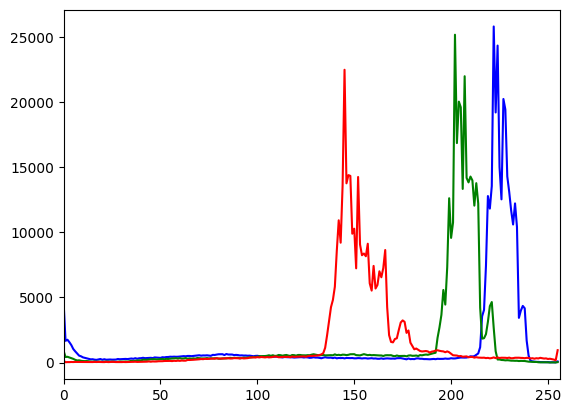

In [ ]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt
from google.colab import files

# Buka gambar dengan PIL
image=cv2.imread('burung.jpg')

color = ('b','g','r')
for i,col in enumerate(color):
  histr = cv2.calcHist([image],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.show()

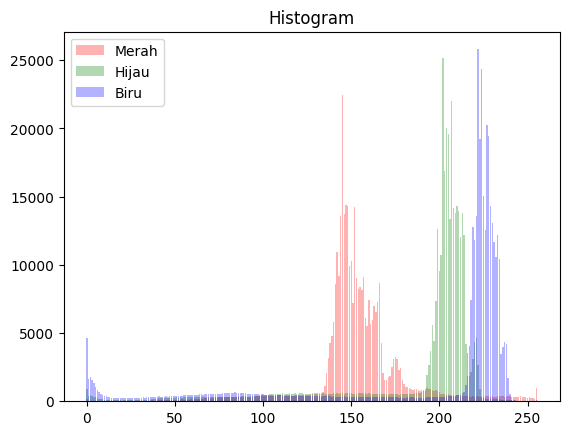

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Buka gambar dengan PIL
img = Image.open("burung.jpg")

# Konversi gambar ke mode RGB
img_rgb = img.convert('RGB')

# Buat histogram dari gambar berwarna
histogram = img_rgb.histogram()

# Gambar histogram gabungan
plt.title("Histogram")
plt.bar(range(256), histogram[:256], color='red', alpha=0.3, label='Merah')
plt.bar(range(256), histogram[256:512], color='green', alpha=0.3, label='Hijau')
plt.bar(range(256), histogram[512:], color='blue', alpha=0.3, label='Biru')
plt.legend()
plt.show()


# **TUGAS 2 PCD**

In [ ]:
#UPLOAD IMAGES

from PIL import Image
import numpy as np
from google.colab import files

# Upload gambar
uploaded = files.upload()

# Baca gambar yang diupload
input_image_path = list(uploaded.keys())[0]

# Buka gambar dengan PIL
img = Image.open(input_image_path)

Saving burung.jpg to burung.jpg


In [ ]:
from PIL import Image
import numpy as np
from google.colab import files

img = Image.open("burung.jpg")

img_gray = img.convert('L')

img_gray.save("burung_gray.jpg")

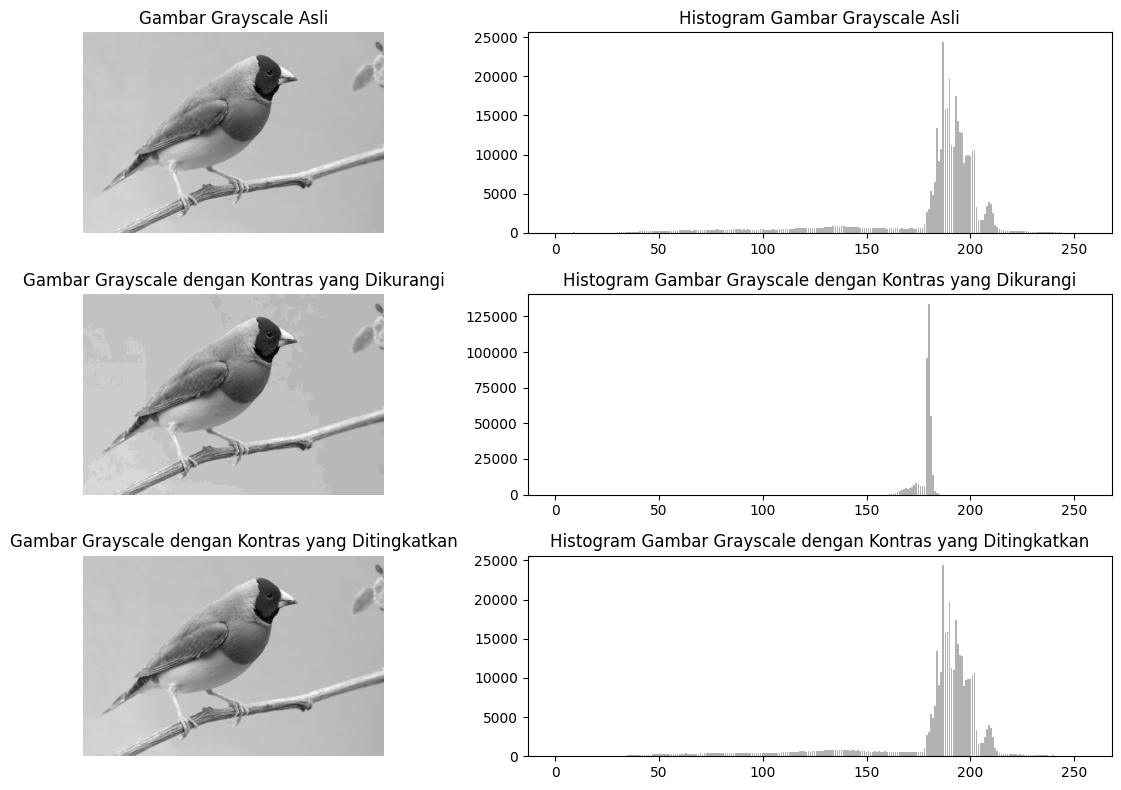

In [39]:
from PIL import Image, ImageEnhance, ImageOps
import matplotlib.pyplot as plt

# Kontras Rendah
# Citra dengan kontras rendah merupakan citra yang memiliki range nilai intensitas yang sempit.
# Histogram citra di bawah ini menunjukkan bahwa citra berada pada range nilai intensitas 74-224.
# Sehingga tidak memiliki nilai intensitas antara 0-74 dan juga 224-255.

# Kontras Tinggi
# Citra dengan kontras tinggi merupakan citra yang memiliki range nilai intensitas yang lebar.
# Histogram citra di bawah ini menunjukkan bahwa citra berada pada range nilai intensitas 0-255.

# Buka gambar grayscale dengan PIL
img = Image.open("burung_gray.jpg")

# Menentukan ukuran gambar
plt.figure(figsize=(12, 8))

# ------------------*Gambar Asli*------------------
# Menampilkan gambar asli
plt.subplot(3, 2, 1)
plt.title("Gambar Grayscale Asli")
plt.imshow(img, cmap='gray')  # cmap='gray' digunakan untuk tampilan grayscale
plt.axis('off')  # Matikan sumbu gambar

# Buat histogram dari gambar asli
histogram = img.histogram()

# Menampilkan histogram gambar asli
plt.subplot(3, 2, 2)  # 1 baris, 2 kolom, tampilkan di subplot kedua
plt.title("Histogram Gambar Grayscale Asli")
plt.bar(range(256), histogram, color='gray', alpha=0.6)

# ------------------*Menurunkan Kontras Gambar*------------------
# Mengurangkan kontras gambar dengan 0.1 faktor pengurangan
contrast_reduced_img = ImageEnhance.Contrast(img).enhance(0.1)

# Tampilkan gambar dengan kontras yang dikurangi
plt.subplot(3, 2, 3)
plt.title("Gambar Grayscale dengan Kontras yang Dikurangi")
plt.imshow(contrast_reduced_img, cmap='gray')  # cmap='gray' digunakan untuk tampilan grayscale
plt.axis('off')  # Matikan sumbu gambar

# Buat histogram dari gambar dengan kontras yang dikurangi
histogram = contrast_reduced_img.histogram()

# Gambar histogram penurunan kontras
plt.subplot(3, 2, 4)
plt.title("Histogram Gambar Grayscale dengan Kontras yang Dikurangi")
plt.bar(range(256), histogram, color='gray', alpha=0.6)

# ------------------*Meregangkan kontras*------------------
# Terapkan operasi meregangkan kontras
contrasted_img = ImageOps.autocontrast(img)

# Tampilkan gambar dengan kontras yang ditingkatkan dengan judul
plt.subplot(3, 2, 5)
plt.title("Gambar Grayscale dengan Kontras yang Ditingkatkan")
plt.imshow(contrasted_img, cmap='gray')  # cmap='gray' digunakan untuk tampilan grayscale
plt.axis('off')  # Matikan sumbu gambar

# Buat histogram dari gambar dengan kontras yang ditingkatkan
histogram = contrasted_img.histogram()

# Gambar histogram
plt.subplot(3, 2, 6)
plt.title("Histogram Gambar Grayscale dengan Kontras yang Ditingkatkan")
plt.bar(range(256), histogram, color='gray', alpha=0.6)

# Menampilkan plot secara horizontal
plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image, ImageEnhance, ImageOps
import matplotlib.pyplot as plt

# Buka gambar berwarna dengan PIL
img = Image.open("burung.jpg")

# Menentukan ukuran gambar
plt.figure(figsize=(12, 8))

# ------------------*Gambar Asli*------------------
# Menampilkan gambar asli
plt.subplot(3, 2, 1)
plt.title("Gambar Berwarna Asli")
plt.imshow(img)
plt.axis('off')  # Matikan sumbu gambar

# Buat histogram dari gambar asli untuk setiap kanal warna
hist_r = img.histogram()[:256]
hist_g = img.histogram()[256:512]
hist_b = img.histogram()[512:768]

# Menampilkan histogram gambar asli
plt.subplot(3, 2, 2)  # 1 baris, 2 kolom, tampilkan di subplot kedua
plt.title("Histogram Gambar Berwarna Asli")
plt.bar(range(256), hist_r, color='red', alpha=0.6, label='Merah')
plt.bar(range(256), hist_g, color='green', alpha=0.6, label='Hijau', bottom=hist_r)
plt.bar(range(256), hist_b, color='blue', alpha=0.6, label='Biru', bottom=[hist_r[i] + hist_g[i] for i in range(256)])
plt.legend()

# ------------------*Menurunkan Kontras Gambar*------------------
# Mengurangkan kontras gambar dengan 0.1 faktor pengurangan
contrast_reduced_img = ImageEnhance.Contrast(img).enhance(0.1)

# Tampilkan gambar dengan kontras yang dikurangi
plt.subplot(3, 2, 3)
plt.title("Gambar Berwarna dengan Kontras yang Dikurangi")
plt.imshow(contrast_reduced_img)
plt.axis('off')  # Matikan sumbu gambar

# Buat histogram dari gambar dengan kontras yang dikurangi untuk setiap kanal warna
hist_r = contrast_reduced_img.histogram()[:256]
hist_g = contrast_reduced_img.histogram()[256:512]
hist_b = contrast_reduced_img.histogram()[512:768]

# Gambar histogram penurunan kontras
plt.subplot(3, 2, 4)
plt.title("Histogram Gambar Berwarna dengan Kontras yang Dikurangi")
plt.bar(range(256), hist_r, color='red', alpha=0.6, label='Merah')
plt.bar(range(256), hist_g, color='green', alpha=0.6, label='Hijau', bottom=hist_r)
plt.bar(range(256), hist_b, color='blue', alpha=0.6, label='Biru', bottom=[hist_r[i] + hist_g[i] for i in range(256)])
plt.legend()

# ------------------*Meregangkan kontras*------------------
# Terapkan operasi meregangkan kontras
contrasted_img = ImageOps.autocontrast(img)

# Tampilkan gambar dengan kontras yang ditingkatkan dengan judul
plt.subplot(3, 2, 5)
plt.title("Gambar Berwarna dengan Kontras yang Ditingkatkan")
plt.imshow(contrasted_img)
plt.axis('off')  # Matikan sumbu gambar

# Buat histogram dari gambar dengan kontras yang ditingkatkan untuk setiap kanal warna
hist_r = contrasted_img.histogram()[:256]
hist_g = contrasted_img.histogram()[256:512]
hist_b = contrasted_img.histogram()[512:768]

# Gambar histogram
plt.subplot(3, 2, 6)
plt.title("Histogram Gambar Berwarna dengan Kontras yang Ditingkatkan")
plt.bar(range(256), hist_r, color='red', alpha=0.6, label='Merah')
plt.bar(range(256), hist_g, color='green', alpha=0.6, label='Hijau', bottom=hist_r)
plt.bar(range(256), hist_b, color='blue', alpha=0.6, label='Biru', bottom=[hist_r[i] + hist_g[i] for i in range(256)])
plt.legend()

# Menampilkan plot secara horizontal
plt.tight_layout()
plt.show()
